In [181]:
import numpy as np
from scipy.fft import fft2, fftshift, ifftshift, ifft2
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

# Задание 1. Фильтрация изображений с периодичностью

(-0.5, 1023.5, 1023.5, -0.5)

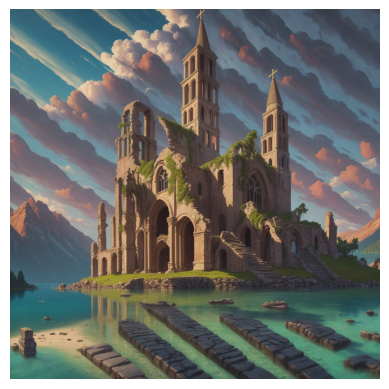

In [182]:
I = cv.imread('2.png')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.imshow(I)
plt.axis('off')

In [183]:
I_norm = I / 255
I_fft = fftshift(fft2(I_norm, axes=(-3, -2)))
I_fft_abs = np.abs(I_fft)
I_fft_angle = np.angle(I_fft)

In [184]:
I_fft_abs_log = np.log(1 + I_fft_abs)
I_fft_abs_log_norm = I_fft_abs_log
I_fft_abs_log_norm = (I_fft_abs_log - np.min(I_fft_abs_log)) 
I_fft_abs_log_norm = I_fft_abs_log / np.max(I_fft_abs_log)

(-0.5, 1023.5, 1023.5, -0.5)

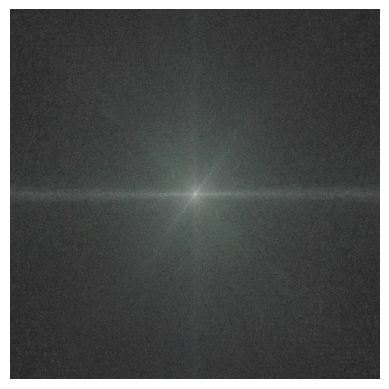

In [185]:
plt.imshow(I_fft_abs_log_norm)
plt.axis('off')

In [186]:
cv.imwrite('output.png', I_fft_abs_log_norm * 255)

True

In [187]:
I_fft_abs_log_norm_fixed = cv.imread('output_fixed.png') / 255

(-0.5, 1023.5, 1023.5, -0.5)

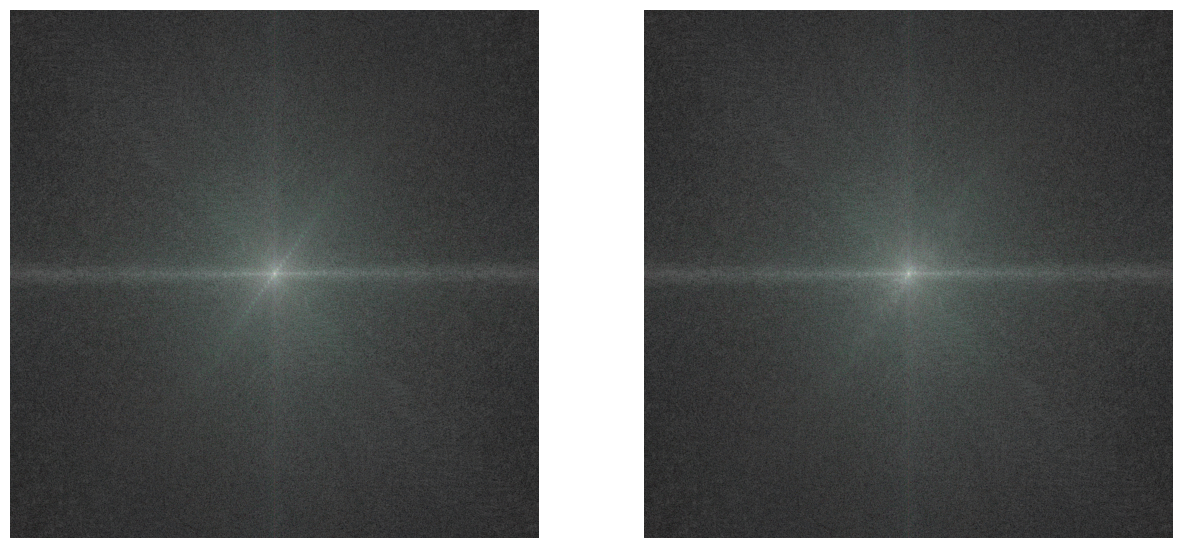

In [188]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.sca(axs[0])
plt.imshow(I_fft_abs_log_norm)
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I_fft_abs_log_norm_fixed)
plt.axis('off')

In [189]:
I_fft_abs_log_norm_fixed = I_fft_abs_log_norm_fixed * (np.max(I_fft_abs_log + np.min(I_fft_abs_log))) + np.min(I_fft_abs_log)
I_fft_abs_fixed = np.exp(I_fft_abs_log_norm_fixed) - 1
I_fft_fixed = I_fft_abs_fixed * np.exp(1j * I_fft_angle)
I_fixed = ifft2(ifftshift(I_fft_fixed), axes=(-3, -2))

In [190]:
I_fixed_norm = np.real(I_fixed)
I_fixed_norm = I_fixed_norm - np.min(I_fixed_norm)
I_fixed_norm = I_fixed_norm / np.max(I_fixed_norm)

(-0.5, 1023.5, 1023.5, -0.5)

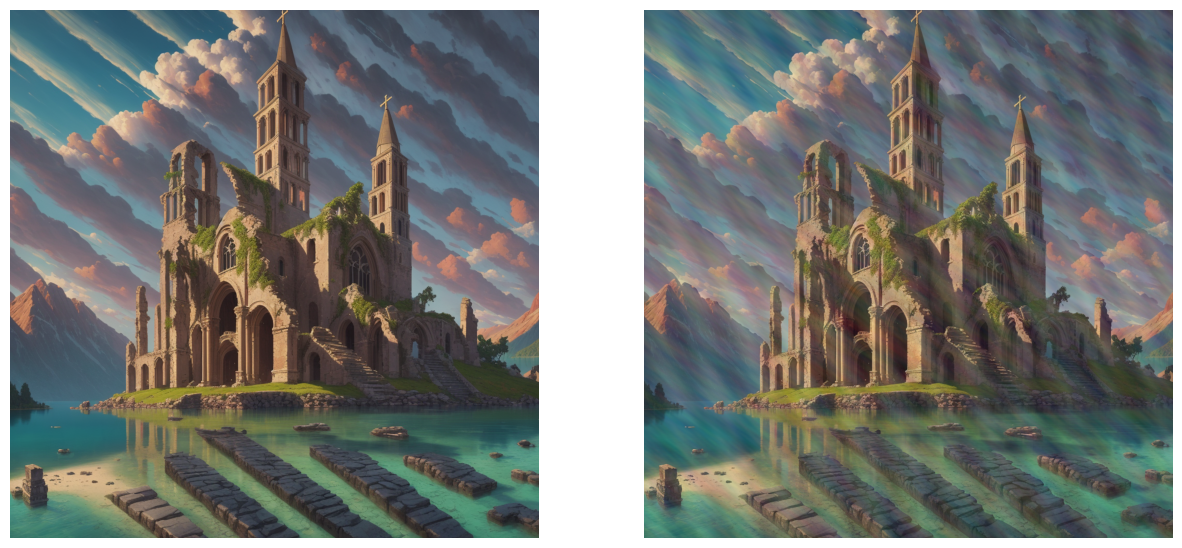

In [191]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.sca(axs[0])
plt.imshow(I)
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I_fixed_norm)
plt.axis('off')

# Задание 2. Размытие изображения

In [240]:
I = cv.imread('white_stripes.jpeg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB) / 255

(-0.5, 1199.5, 1199.5, -0.5)

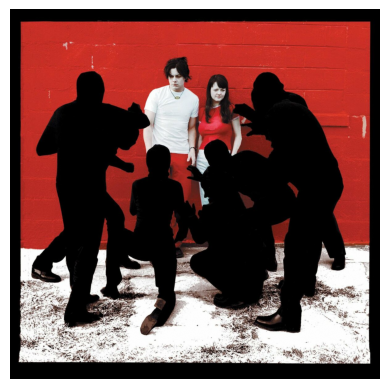

In [241]:
plt.imshow(I)
plt.axis('off')

In [242]:
I_red, I_green, I_blue = cv.split(I)

In [243]:
n1, n2, n3 = 9, 15, 21

In [244]:
med1 = np.ones((n1, n1)) / (n1 ** 2)
med2 = np.ones((n2, n2)) / (n2 ** 2)
med3 = np.ones((n3, n3)) / (n3 ** 2)

In [245]:
gauss1 = np.zeros((n1, n1))
gauss2 = np.zeros((n2, n2))
gauss3 = np.zeros((n3, n3))

for x in range(1, n1 + 1):
    for y in range(1, n1 + 1):
        gauss1[x - 1][y - 1] = np.exp(-9 / (n1 ** 2) * ((x - (n1 + 1) / 2) ** 2 + (y - (n1 + 1) / 2) ** 2))

for x in range(1, n2 + 1):
    for y in range(1, n2 + 1):
        gauss2[x - 1][y - 1] = np.exp(-9 / (n2 ** 2) * ((x - (n2 + 1) / 2) ** 2 + (y - (n2 + 1) / 2) ** 2))

for x in range(1, n3 + 1):
    for y in range(1, n3 + 1):
        gauss3[x - 1][y - 1] = np.exp(-9 / (n3 ** 2) * ((x - (n3 + 1) / 2) ** 2 + (y - (n3 + 1) / 2) ** 2))

gauss1 = gauss1 / np.sum(gauss1)
gauss2 = gauss2 / np.sum(gauss2)
gauss3 = gauss3 / np.sum(gauss3)

In [246]:
I_red_med1, I_green_med1, I_blue_med1 = convolve(I_red, med1), convolve(I_green, med1), convolve(I_blue, med1)
I_red_med2, I_green_med2, I_blue_med2 = convolve(I_red, med2), convolve(I_green, med2), convolve(I_blue, med2)
I_red_med3, I_green_med3, I_blue_med3 = convolve(I_red, med3), convolve(I_green, med3), convolve(I_blue, med3)

In [247]:
I_red_gauss1, I_green_gauss1, I_blue_gauss1 = convolve(I_red, gauss1), convolve(I_green, gauss1), convolve(I_blue, gauss1)
I_red_gauss2, I_green_gauss2, I_blue_gauss2 = convolve(I_red, gauss2), convolve(I_green, gauss2), convolve(I_blue, gauss2)
I_red_gauss3, I_green_gauss3, I_blue_gauss3 = convolve(I_red, gauss3), convolve(I_green, gauss3), convolve(I_blue, gauss3)

In [248]:
I_med1 = cv.merge([I_red_med1, I_green_med1, I_blue_med1])
I_med2 = cv.merge([I_red_med2, I_green_med2, I_blue_med2])
I_med3 = cv.merge([I_red_med3, I_green_med3, I_blue_med3])

(-0.5, 1199.5, 1199.5, -0.5)

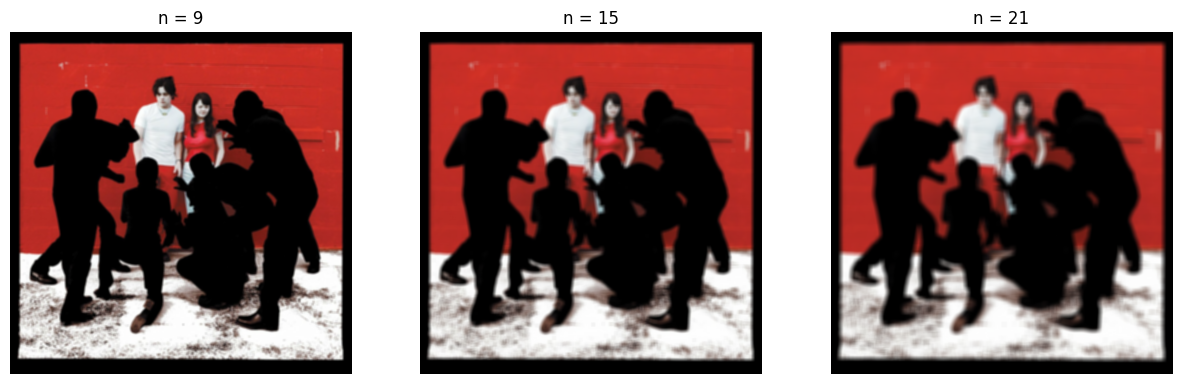

In [249]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.title('n = 9')
plt.imshow(I_med1)
plt.axis('off')
plt.sca(axs[1])
plt.title('n = 15')
plt.imshow(I_med2)
plt.axis('off')
plt.sca(axs[2])
plt.title('n = 21')
plt.imshow(I_med3)
plt.axis('off')

In [250]:
I_gauss1 = cv.merge([I_red_gauss1, I_green_gauss1, I_blue_gauss1])
I_gauss2 = cv.merge([I_red_gauss2, I_green_gauss2, I_blue_gauss2])
I_gauss3 = cv.merge([I_red_gauss3, I_green_gauss3, I_blue_gauss3])

(-0.5, 1199.5, 1199.5, -0.5)

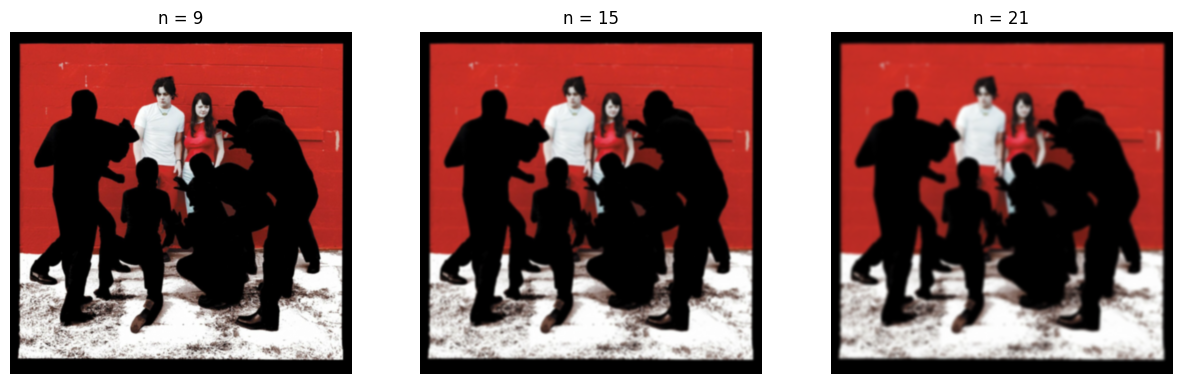

In [251]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.title('n = 9')
plt.imshow(I_gauss1)
plt.axis('off')
plt.sca(axs[1])
plt.title('n = 15')
plt.imshow(I_gauss2)
plt.axis('off')
plt.sca(axs[2])
plt.title('n = 21')
plt.imshow(I_gauss3)
plt.axis('off')

In [252]:
I_red_fft = fft2(I_red, (I.shape[0], I.shape[1]))
I_green_fft = fft2(I_green, (I.shape[0], I.shape[1]))
I_blue_fft = fft2(I_blue, (I.shape[0], I.shape[1]))

In [253]:
med1_fft = fft2(med1, (I.shape[0], I.shape[1]))
gauss1_fft = fft2(gauss1, (I.shape[0], I.shape[1]))

In [254]:
I_red_med1, I_green_med1, I_blue_med1 = I_red_fft * med1_fft, I_green_fft * med1_fft, I_blue_fft * med1_fft
I_red_gauss1, I_green_gauss1, I_blue_gauss1 = I_red_fft * gauss1_fft, I_green_fft * gauss1_fft, I_blue_fft * gauss1_fft

In [255]:
med2_fft = fft2(med2, (I.shape[0], I.shape[1]))
gauss2_fft = fft2(gauss2, (I.shape[0], I.shape[1]))

In [256]:
I_red_med2, I_green_med2, I_blue_med2 = I_red_fft * med2_fft, I_green_fft * med2_fft, I_blue_fft * med2_fft
I_red_gauss2, I_green_gauss2, I_blue_gauss2 = I_red_fft * gauss2_fft, I_green_fft * gauss2_fft, I_blue_fft * gauss2_fft

In [257]:
med3_fft = fft2(med3, (I.shape[0], I.shape[1]))
gauss3_fft = fft2(gauss3, (I.shape[0], I.shape[1]))

In [258]:
I_red_med3, I_green_med3, I_blue_med3 = I_red_fft * med3_fft, I_green_fft * med3_fft, I_blue_fft * med3_fft
I_red_gauss3, I_green_gauss3, I_blue_gauss3 = I_red_fft * gauss3_fft, I_green_fft * gauss3_fft, I_blue_fft * gauss3_fft

In [259]:
I_red_med1, I_green_med1, I_blue_med1 = ifft2(I_red_med1), ifft2(I_green_med1), ifft2(I_blue_med1)
I_red_med2, I_green_med2, I_blue_med2 = ifft2(I_red_med2), ifft2(I_green_med2), ifft2(I_blue_med2)
I_red_med3, I_green_med3, I_blue_med3 = ifft2(I_red_med3), ifft2(I_green_med3), ifft2(I_blue_med3)

I_red_gauss1, I_green_gauss1, I_blue_gauss1 = ifft2(I_red_gauss1), ifft2(I_green_gauss1), ifft2(I_blue_gauss1)
I_red_gauss2, I_green_gauss2, I_blue_gauss2 = ifft2(I_red_gauss2), ifft2(I_green_gauss2), ifft2(I_blue_gauss2)
I_red_gauss3, I_green_gauss3, I_blue_gauss3 = ifft2(I_red_gauss3), ifft2(I_green_gauss3), ifft2(I_blue_gauss3)

In [260]:
I_med1 = cv.merge([np.real(I_red_med1), np.real(I_green_med1), np.real(I_blue_med1)])
I_med2 = cv.merge([np.real(I_red_med2), np.real(I_green_med2), np.real(I_blue_med2)])
I_med3 = cv.merge([np.real(I_red_med3), np.real(I_green_med3), np.real(I_blue_med3)])

I_gauss1 = cv.merge([np.real(I_red_gauss1), np.real(I_green_gauss1), np.real(I_blue_gauss1)])
I_gauss2 = cv.merge([np.real(I_red_gauss2), np.real(I_green_gauss2), np.real(I_blue_gauss2)])
I_gauss3 = cv.merge([np.real(I_red_gauss3), np.real(I_green_gauss3), np.real(I_blue_gauss3)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1199.5, 1199.5, -0.5)

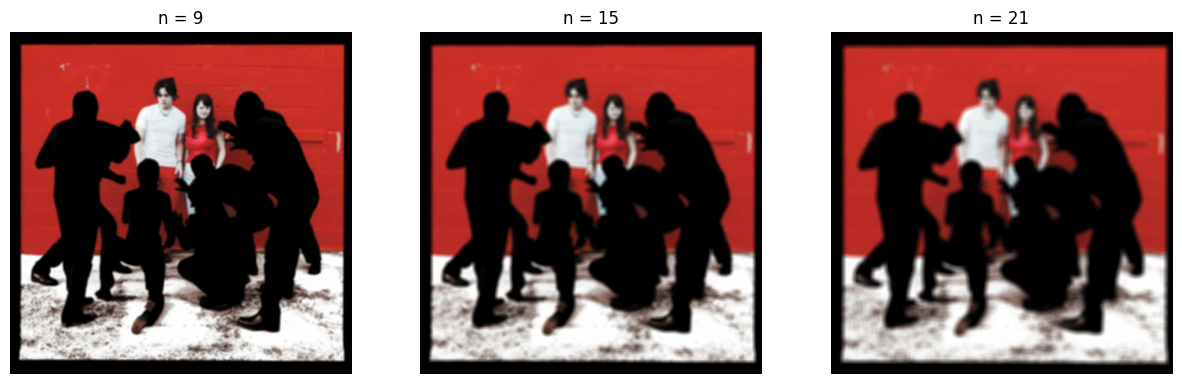

In [261]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.title('n = 9')
plt.imshow(I_med1 / np.max(I_med1))
plt.axis('off')
plt.sca(axs[1])
plt.title('n = 15')
plt.imshow(I_med2 / np.max(I_med2))
plt.axis('off')
plt.sca(axs[2])
plt.title('n = 21')
plt.imshow(I_med3 / np.max(I_med3))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1199.5, 1199.5, -0.5)

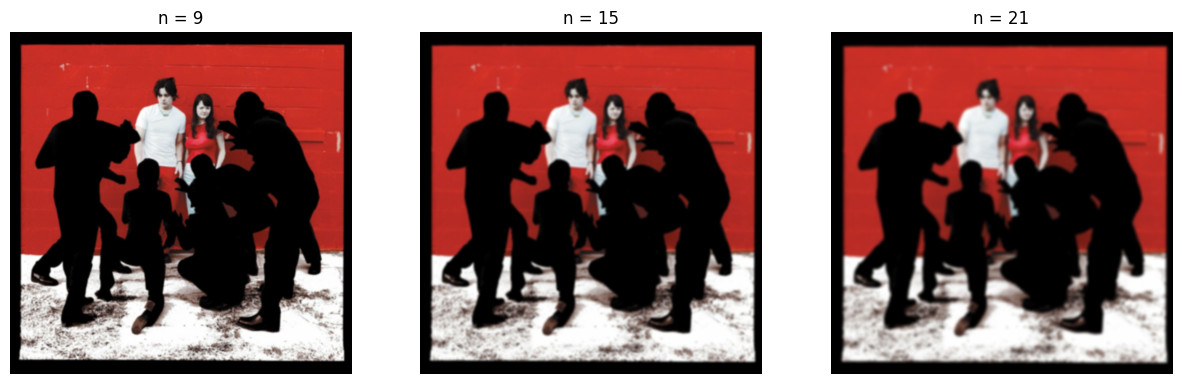

In [262]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.title('n = 9')
plt.imshow(I_gauss1 / np.max(I_gauss1))
plt.axis('off')
plt.sca(axs[1])
plt.title('n = 15')
plt.imshow(I_gauss2 / np.max(I_gauss2))
plt.axis('off')
plt.sca(axs[2])
plt.title('n = 21')
plt.imshow(I_gauss3 / np.max(I_gauss3))
plt.axis('off')

# Задание 3. Увеличение резкости

In [263]:
I = cv.imread('elephant.jpeg') 
I = cv.cvtColor(I, cv.COLOR_BGR2RGB) / 255

(-0.5, 695.5, 517.5, -0.5)

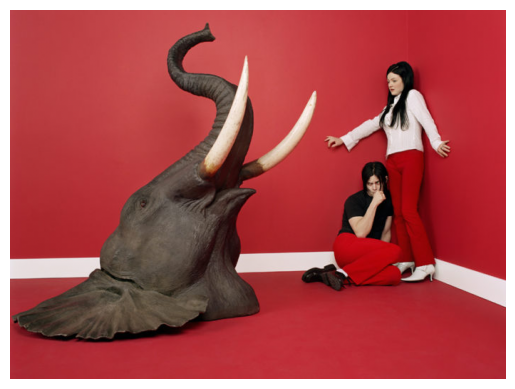

In [264]:
plt.imshow(I)
plt.axis('off')

In [265]:
I_red, I_green, I_blue = cv.split(I)

In [266]:
sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [267]:
I_red_sharp1, I_green_sharp1, I_blue_sharp1 = convolve(I_red, sharp), convolve(I_green, sharp), convolve(I_blue, sharp)
I_red_sharp2, I_green_sharp2, I_blue_sharp2 = convolve(I_red_sharp1, sharp), convolve(I_green_sharp1, sharp), convolve(I_blue_sharp1, sharp)
I_red_sharp3, I_green_sharp3, I_blue_sharp3 = convolve(I_red_sharp2, sharp), convolve(I_green_sharp2, sharp), convolve(I_blue_sharp2, sharp)

In [268]:
I_sharp1 = cv.merge([I_red_sharp1, I_green_sharp1, I_blue_sharp1])
I_sharp2 = cv.merge([I_red_sharp2, I_green_sharp2, I_blue_sharp2])
I_sharp3 = cv.merge([I_red_sharp3, I_green_sharp3, I_blue_sharp3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 695.5, 517.5, -0.5)

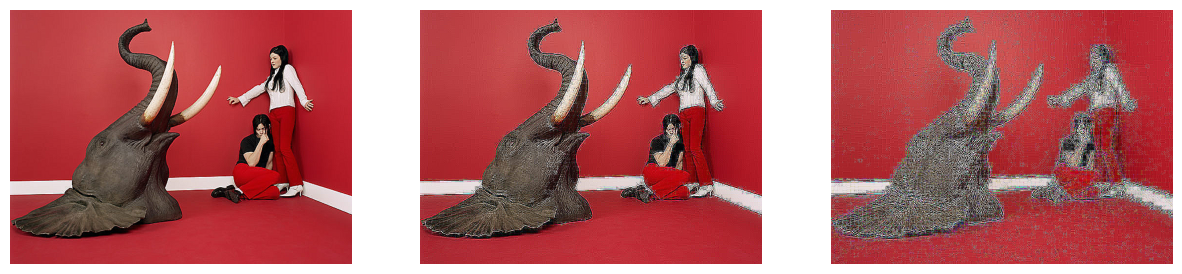

In [270]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.imshow(I_sharp1)
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I_sharp2)
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I_sharp3)
plt.axis('off')

In [271]:
I_red_fft = fft2(I_red, (I.shape[0], I.shape[1]))
I_green_fft = fft2(I_green, (I.shape[0], I.shape[1]))
I_blue_fft = fft2(I_blue, (I.shape[0], I.shape[1]))

In [272]:
sharp_fft = fft2(sharp, (I.shape[0], I.shape[1]))

In [273]:
I_red_sharp1, I_green_sharp1, I_blue_sharp1 = I_red_fft * sharp_fft, I_green_fft * sharp_fft, I_blue_fft * sharp_fft
I_red_sharp2, I_green_sharp2, I_blue_sharp2 = I_red_fft * sharp_fft * sharp_fft, I_green_fft * sharp_fft * sharp_fft, I_blue_fft * sharp_fft * sharp_fft
I_red_sharp3, I_green_sharp3, I_blue_sharp3 = I_red_fft * sharp_fft * sharp_fft * sharp_fft, I_green_fft * sharp_fft * sharp_fft * sharp_fft, I_blue_fft * sharp_fft * sharp_fft * sharp_fft

In [274]:
I_red_sharp1, I_green_sharp1, I_blue_sharp1 = ifft2(I_red_sharp1), ifft2(I_green_sharp1), ifft2(I_blue_sharp1)
I_red_sharp2, I_green_sharp2, I_blue_sharp2 = ifft2(I_red_sharp2), ifft2(I_green_sharp2), ifft2(I_blue_sharp2)
I_red_sharp3, I_green_sharp3, I_blue_sharp3 = ifft2(I_red_sharp3), ifft2(I_green_sharp3), ifft2(I_blue_sharp3)

In [276]:
I_sharp1 = cv.merge([np.real(I_red_sharp1), np.real(I_green_sharp1), np.real(I_blue_sharp1)])
I_sharp2 = cv.merge([np.real(I_red_sharp2), np.real(I_green_sharp2), np.real(I_blue_sharp2)])
I_sharp3 = cv.merge([np.real(I_red_sharp3), np.real(I_green_sharp3), np.real(I_blue_sharp3)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 695.5, 517.5, -0.5)

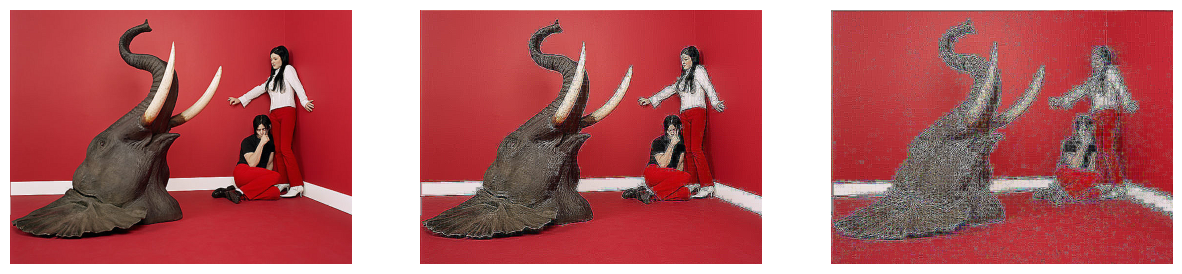

In [280]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.imshow(I_sharp1 )
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I_sharp2)
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I_sharp3)
plt.axis('off')

# Задание 4. Выделение краёв

In [313]:
I = cv.imread('mushroom.jpeg', cv.IMREAD_GRAYSCALE)
I = I / 255

(-0.5, 222.5, 225.5, -0.5)

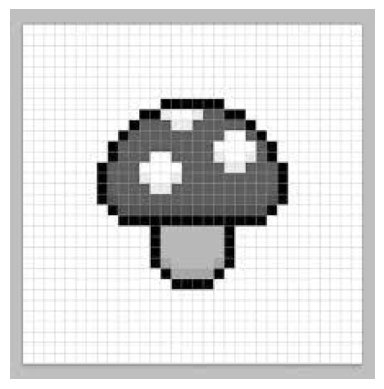

In [314]:
plt.imshow(I, cmap='gray')
plt.axis('off')

In [315]:
edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [316]:
I_edge1 = convolve(I, edge)
I_edge2 = convolve(I_edge1, edge)
I_edge3 = convolve(I_edge2, edge)

In [317]:
I_edge1 = I_edge1 - np.min(I_edge1)
I_edge1 = I_edge1 / np.max(I_edge1)

I_edge2 = I_edge2 - np.min(I_edge2)
I_edge2 = I_edge2 / np.max(I_edge2)

I_edge3 = I_edge3 - np.min(I_edge3)
I_edge3 = I_edge3 / np.max(I_edge3)

(-0.5, 222.5, 225.5, -0.5)

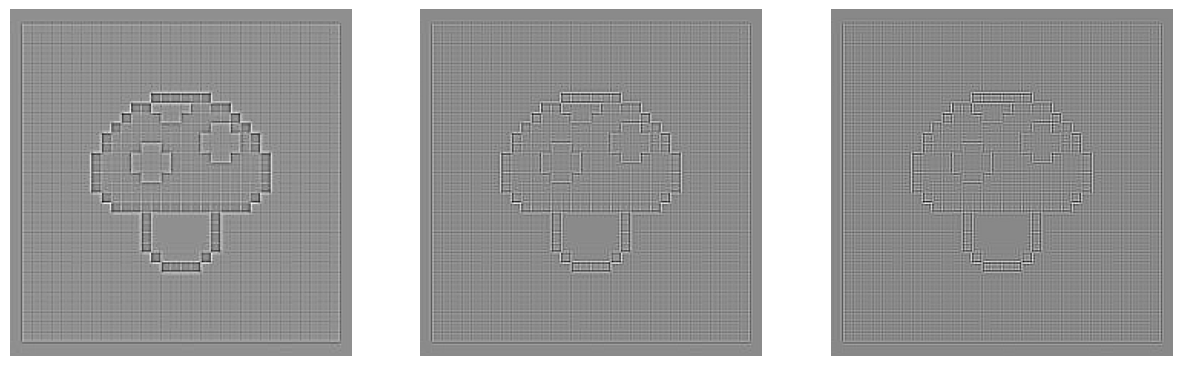

In [321]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.imshow(I_edge1, cmap='gray')
plt.axis('off')
plt.sca(axs[1])
plt.imshow(I_edge2, cmap='gray')
plt.axis('off')
plt.sca(axs[2])
plt.imshow(I_edge3, cmap='gray')
plt.axis('off')

In [323]:
I_fft = fft2(I)
edge_fft = fft2(edge, (I.shape[0], I.shape[1]))

In [324]:
I_edge1 = I_fft * edge_fft
I_edge2 = I_edge1 * edge_fft
I_edge3 = I_edge2 * edge_fft

In [325]:
I_edge1 = ifft2(I_edge1)
I_edge2 = ifft2(I_edge2)
I_edge3 = ifft2(I_edge3)

(-0.5, 222.5, 225.5, -0.5)

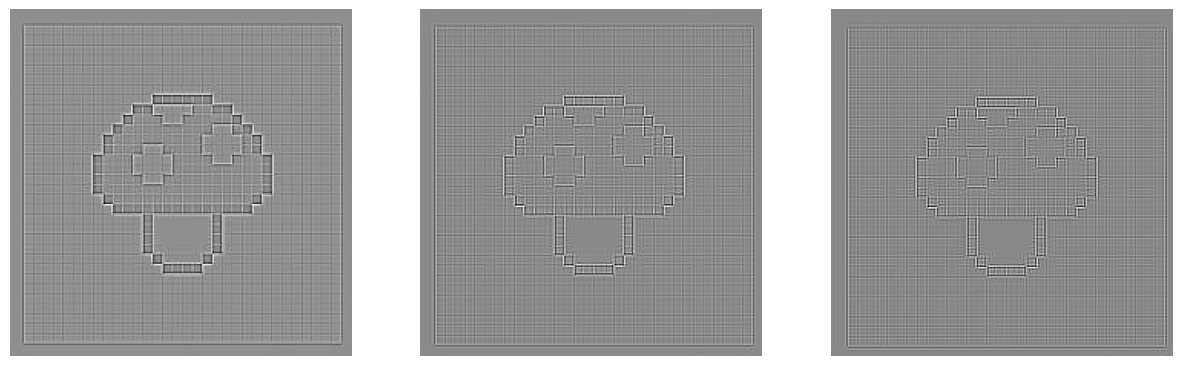

In [328]:
fig, axs = plt.subplots(1, 3, figsize = (15, 7))
plt.sca(axs[0])
plt.imshow(np.real(I_edge1), cmap='gray')
plt.axis('off')
plt.sca(axs[1])
plt.imshow(np.real(I_edge2), cmap='gray')
plt.axis('off')
plt.sca(axs[2])
plt.imshow(np.real(I_edge3), cmap='gray')
plt.axis('off')